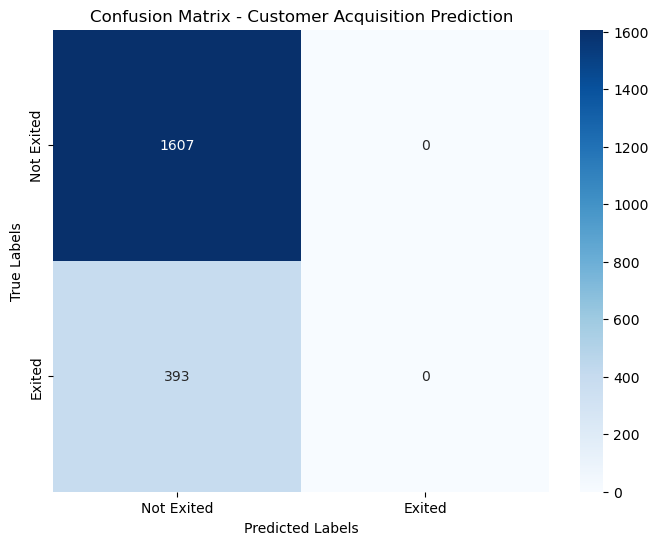

Customer Acquisition Prediction:
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
data = pd.read_csv('data.csv')

# Decision Trees or Random Forest for Predicting Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier with preprocessing pipeline
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model and make predictions
random_forest.fit(X_train, y_train)
predictions_acquisition = random_forest.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_acquisition, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Customer Acquisition Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print results
print("Customer Acquisition Prediction:")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_acquisition, zero_division=1))
